In [4]:
# create the dataset

from datetime import datetime, timedelta
import random
import pandas as pd

# Generate synthetic data for onebike_datetimes
num_entries = 1000
start_date = datetime(2017, 10, 1)
end_date = datetime(2017, 12, 31)

onebike_datetimes = []

for _ in range(num_entries):
    # Generate a random start time within the date range
    random_days = random.randint(0, (end_date - start_date).days)
    random_time = timedelta(hours=random.randint(0, 23), minutes=random.randint(0, 59))
    start_datetime = start_date + timedelta(days=random_days) + random_time
    
    # Generate a random duration between 5 and 120 minutes for the trip
    duration = timedelta(minutes=random.randint(5, 120))
    end_datetime = start_datetime + duration

    onebike_datetimes.append({'start': start_datetime, 'end': end_datetime})

# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}

# Loop over all trips
for trip in onebike_datetimes:
    # Check to see if the trip starts before noon
    if trip['start'].hour < 12:
        # Increment the counter for before noon
        trip_counts['AM'] += 1
    else:
        # Increment the counter for after noon
        trip_counts['PM'] += 1

# Convert the data into a DataFrame
df = pd.DataFrame(onebike_datetimes)

# Save the dataset to a CSV file
df.to_csv("onebike_trip_data.csv", index=False)

# Print the first few rows of the dataset
print(df.head())

# Print trip counts
print("Trip Counts:", trip_counts)


                start                 end
0 2017-11-04 00:43:00 2017-11-04 01:22:00
1 2017-10-22 08:34:00 2017-10-22 10:25:00
2 2017-12-31 01:36:00 2017-12-31 03:14:00
3 2017-11-02 01:20:00 2017-11-02 02:15:00
4 2017-12-10 19:07:00 2017-12-10 19:31:00
Trip Counts: {'AM': 511, 'PM': 489}


In [5]:
onbike_datetimes = pd.read_csv('/kaggle/working/onebike_trip_data.csv')
onbike_datetimes.head()

,start,end
0,2017-11-04 00:43:00,2017-11-04 01:22:00
1,2017-10-22 08:34:00,2017-10-22 10:25:00
2,2017-12-31 01:36:00,2017-12-31 03:14:00
3,2017-11-02 01:20:00,2017-11-02 02:15:00
4,2017-12-10 19:07:00,2017-12-10 19:31:00


In [6]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip['start'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 511, 'PM': 489}


eat! It looks like this bike is used about twice as much after noon than it is before noon. One obvious follow up would be to see _which_ hours the bike is most likely to be taken out for a ride

# Turning strings into datetimes
When you download data from the Internet, dates and times usually come to you as strings. Often the first step is to turn those strings into datetime objects.


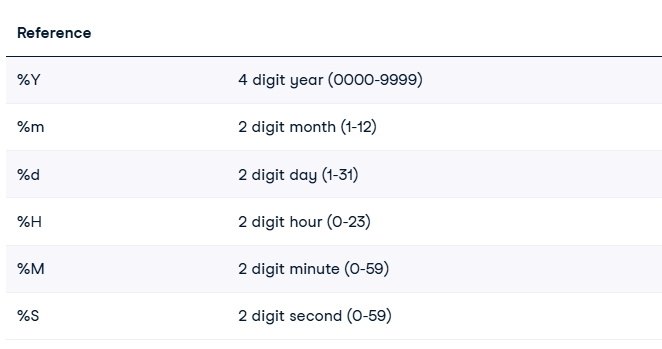


* Determine the format needed to convert s to datetime and assign it to fmt.
* Convert the string s to datetime using fmt.
* Determine the format needed to convert s to datetime and assign it to fmt.
* Convert the string s to datetime using fmt.
* Determine the format needed to convert s to datetime and assign it to fmt.Convert the string s to datetime using fmt.




In [7]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


In [8]:
# Import the datetime class
from datetime import datetime

# Starting string, in YYYY-MM-DD format
s = '2030-10-15'

# Write a format string to parse s
fmt = '%Y-%m-%d'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2030-10-15 00:00:00


In [9]:
# Import the datetime class
from datetime import datetime

# Starting string, in MM/DD/YYYY HH:MM:SS format
s = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt = '%m/%d/%Y %H:%M:%S'
# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

1986-12-15 08:00:00


Now you can parse dates in most common formats. Unfortunately, Python does not have the ability to parse non-zero-padded dates and times out of the box (such as 1/2/2018). If needed, you can use other string methods to create zero-padded strings suitable for strptime()

### Parsing pairs of strings as datetimes
Up until now, you've been working with a pre-processed list of datetimes for W20529's trips. For this exercise, you're going to go one step back in the data cleaning pipeline and work with the strings that the data started as.

Explore onebike_datetime_strings in the IPython shell to determine the correct format. datetime has already been loaded for you.


* Outside the for loop, fill out the fmt string with the correct parsing format for the data.
* Within the for loop, parse the start and end strings into the trip dictionary with start and end keys and datetime objects for values.

In [14]:
from datetime import datetime, timedelta
import random
import pandas as pd

# Generate synthetic data for onebike_datetime_strings
num_entries = 1000
start_date = datetime(2017, 10, 1)
end_date = datetime(2017, 12, 31)

onebike_datetime_strings = []

for _ in range(num_entries):
    # Generate a random start time within the date range
    random_days = random.randint(0, (end_date - start_date).days)
    random_time = timedelta(hours=random.randint(0, 23), minutes=random.randint(0, 59), seconds=random.randint(0, 59))
    start_datetime = start_date + timedelta(days=random_days) + random_time
    
    # Generate a random duration between 5 and 120 minutes for the trip
    duration = timedelta(minutes=random.randint(5, 120))
    end_datetime = start_datetime + duration

    # Convert to string format
    start_str = start_datetime.strftime("%Y-%m-%d %H:%M:%S")
    end_str = end_datetime.strftime("%Y-%m-%d %H:%M:%S")

    onebike_datetime_strings.append({'start': start_str, 'end': end_str})

# Define the format string for parsing
fmt = "%Y-%m-%d %H:%M:%S"

# Convert string data back to datetime objects
parsed_trips = []
for trip in onebike_datetime_strings:
    parsed_trips.append({
        'start': datetime.strptime(trip['start'], fmt),
        'end': datetime.strptime(trip['end'], fmt)
    })

# Convert the data into a DataFrame
df_parsed = pd.DataFrame(parsed_trips)

# Save the dataset to a CSV file
df_parsed.to_csv("parsed_onebike_trip_data.csv", index=False)

onebike_datetime_strings[:10]


[{'start': '2017-12-03 12:34:18', 'end': '2017-12-03 13:55:18'},
 {'start': '2017-10-05 14:18:59', 'end': '2017-10-05 15:29:59'},
 {'start': '2017-10-09 22:47:01', 'end': '2017-10-10 00:46:01'},
 {'start': '2017-12-25 17:24:46', 'end': '2017-12-25 17:59:46'},
 {'start': '2017-12-04 06:59:25', 'end': '2017-12-04 07:32:25'},
 {'start': '2017-10-26 19:32:18', 'end': '2017-10-26 19:55:18'},
 {'start': '2017-11-19 11:18:18', 'end': '2017-11-19 12:01:18'},
 {'start': '2017-11-25 12:12:40', 'end': '2017-11-25 13:41:40'},
 {'start': '2017-11-16 00:45:52', 'end': '2017-11-16 00:56:52'},
 {'start': '2017-11-26 06:49:52', 'end': '2017-11-26 06:55:52'}]

In [17]:
# Extract only the 'start' values from onebike_datetime_strings
start_times = [trip['start'] for trip in onebike_datetime_strings]

# Convert to a DataFrame
df_start_times = pd.DataFrame(start_times, columns=['start'])

# Save the dataset to a CSV file
df_start_times.to_csv("onebike_start_times.csv", index=False)

# Print the first few rows
print(df_start_times.head())


                 start
0  2017-12-03 12:34:18
1  2017-10-05 14:18:59
2  2017-10-09 22:47:01
3  2017-12-25 17:24:46
4  2017-12-04 06:59:25


In [19]:
# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings.start:
  trip = {'start': datetime.strptime(start,fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)

                start
0 2017-12-03 12:34:18
1 2017-10-05 14:18:59
2 2017-10-09 22:47:01
3 2017-12-25 17:24:46
4 2017-12-04 06:59:25


Excellent! Now you know how to process lists of strings into a more useful structure. If you haven't come across this approach before, many complex data cleaning tasks follow this same format: start with a list, process each element, and add the processed data to a new list.

### Recreating ISO format with strftime()
In the last chapter, you used strftime() to create strings from date objects. Now that you know about datetime objects, let's practice doing something similar.

Re-create the .isoformat() method, using .strftime(), and print the first trip start in our data set.


* Complete fmt to match the format of ISO 8601.
* Print first_start with both .isoformat() and .strftime(); they should match.

In [20]:
# Import datetime
from datetime import datetime

# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-12-03T12:34:18
2017-12-03T12:34:18


There are a wide variety of time formats you can create with strftime(), depending on your needs. However, if you don't know exactly what you need, .isoformat() is a perfectly fine place to start.

### Unix timestamps
Datetimes are sometimes stored as Unix timestamps: the number of seconds since January 1, 1970. This is especially common with computer infrastructure, like the log files that websites keep when they get visitors.

* Complete the for loop to loop over timestamps.
* Complete the code to turn each timestamp ts into a datetime.

In [21]:
# Import datetime
from datetime import datetime

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 20, 19, 13), datetime.datetime(2017, 12, 30, 20, 9, 3)]


The largest number that some older computers can hold in one variable is 2147483648, which as a Unix timestamp is in January 2038. On that day, many computers which haven't been upgraded will fail. Hopefully, none of them are running anything critical!

# Turning pairs of datetimes into durations
When working with timestamps, we often want to know how much time has elapsed between events. Thankfully, we can use datetime arithmetic to ask Python to do the heavy lifting for us so we don't need to worry about day, month, or year boundaries. Let's calculate the number of seconds that the bike was out of the dock for each trip.

Continuing our work from a previous coding exercise, the bike trip data has been loaded as the list onebike_datetimes. Each element of the list consists of two datetime objects, corresponding to the start and end of a trip, respectively.


* Within the loop:
* Use arithmetic on the start and end elements to find the length of the trip
* Save the results to trip_duration.
* Calculate trip_length_seconds from trip_duration.

In [23]:
onbike_datetimes

,start,end
0,2017-11-04 00:43:00,2017-11-04 01:22:00
1,2017-10-22 08:34:00,2017-10-22 10:25:00
2,2017-12-31 01:36:00,2017-12-31 03:14:00
3,2017-11-02 01:20:00,2017-11-02 02:15:00
4,2017-12-10 19:07:00,2017-12-10 19:31:00
...,...,...
995,2017-12-30 15:24:00,2017-12-30 15:43:00
996,2017-10-10 15:05:00,2017-10-10 16:49:00
997,2017-10-10 17:36:00,2017-10-10 18:23:00
998,2017-10-15 13:16:00,2017-10-15 13:58:00


In [24]:
# Define the format for parsing datetime strings
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list to store trip durations
onebike_durations = []

# Ensure that both 'start' and 'end' are included
onebike_datetimes = [
    {'start': datetime.strptime(trip['start'], fmt), 'end': datetime.strptime(trip['end'], fmt)}
    for trip in onebike_datetime_strings
]

# Loop through the trips and calculate durations
for trip in onebike_datetimes:
    # Create a timedelta object corresponding to the length of the trip
    trip_duration = trip['end'] - trip['start']
    
    # Get the total elapsed seconds in trip_duration
    trip_length_seconds = trip_duration.total_seconds()
    
    # Append the results to our list
    onebike_durations.append(trip_length_seconds)

# Convert the durations into a DataFrame
df_durations = pd.DataFrame(onebike_durations, columns=['duration_seconds'])

# Save the dataset to a CSV file
df_durations.to_csv("onebike_trip_durations.csv", index=False)

# Print the first few rows
print(df_durations.head())


   duration_seconds
0            4860.0
1            4260.0
2            7140.0
3            2100.0
4            1980.0


Remember that timedelta objects are represented in Python as a number of days and seconds of elapsed time. Be careful not to use .seconds on a timedelta object, since you'll just get the number of seconds without the days

# Average trip time
W20529 took 291 trips in our data set. How long were the trips on average? We can use the built-in Python functions sum() and len() to make this calculation.

Based on your last coding exercise, the data has been loaded as onebike_durations. Each entry is a number of seconds that the bike was out of the dock.


* Calculate total_elapsed_time across all trips in onebike_durations.
* Calculate number_of_trips for onebike_durations.
* Divide total_elapsed_time by number_of_trips to get the average trip length.

In [25]:
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

3689.76


Great work, and not remotely average! For the average to be a helpful summary of the data, we need for all of our durations to be reasonable numbers, and not a few that are way too big, way too small, or even malformed. For example, if there is anything fishy happening in the data, and our trip ended before it started, we'd have a negative trip length.

### The long and the short of why time is hard
Out of 291 trips taken by W20529, how long was the longest? How short was the shortest? Does anything look fishy?

As before, data has been loaded as onebike_durations.


* Calculate shortest_trip from onebike_durations.
* Calculate longest_trip from onebike_durations.
* Print the results, turning shortest_trip and longest_trip into strings so they can print.

In [26]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was 300.0 seconds
The longest trip was 7200.0 seconds


Weird huh?! For at least one trip, the bike returned before it left. Why could that be? Here's a hint: it happened in early November, around 2AM local time. What happens to clocks around that time each year? By the end of the next chapter, we'll have all the tools we need to deal with this situation!